# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

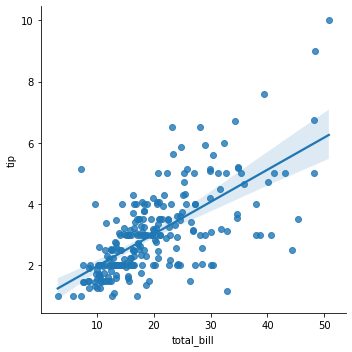

In [4]:
sns.lmplot(x='total_bill',y='tip',data=tips)

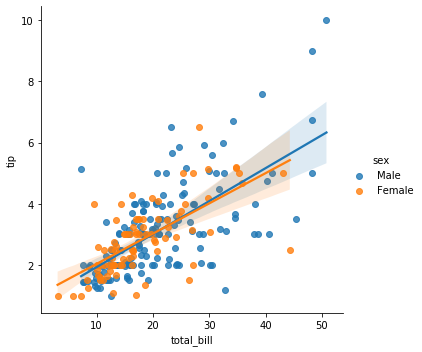

In [5]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

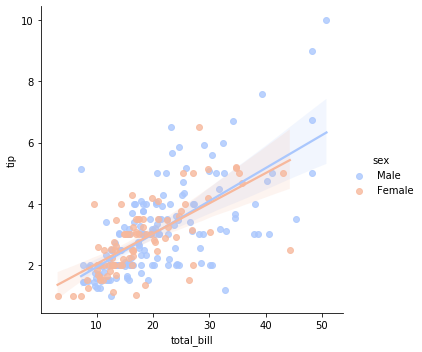

In [6]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

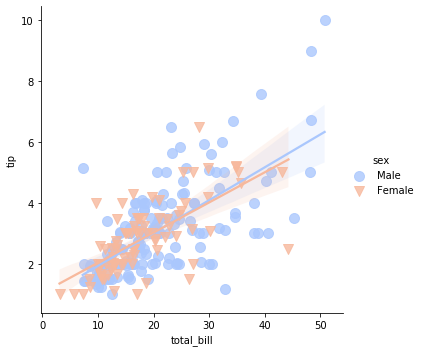

In [7]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

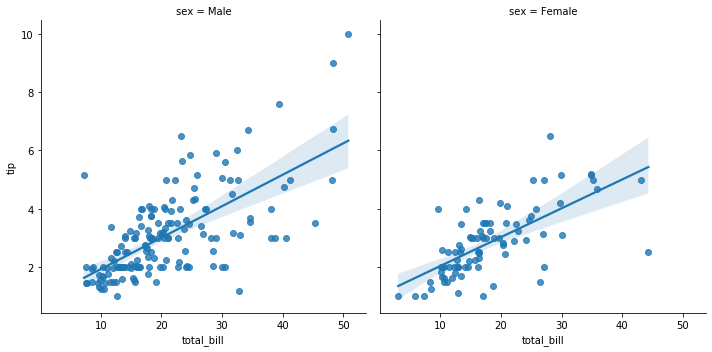

In [8]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

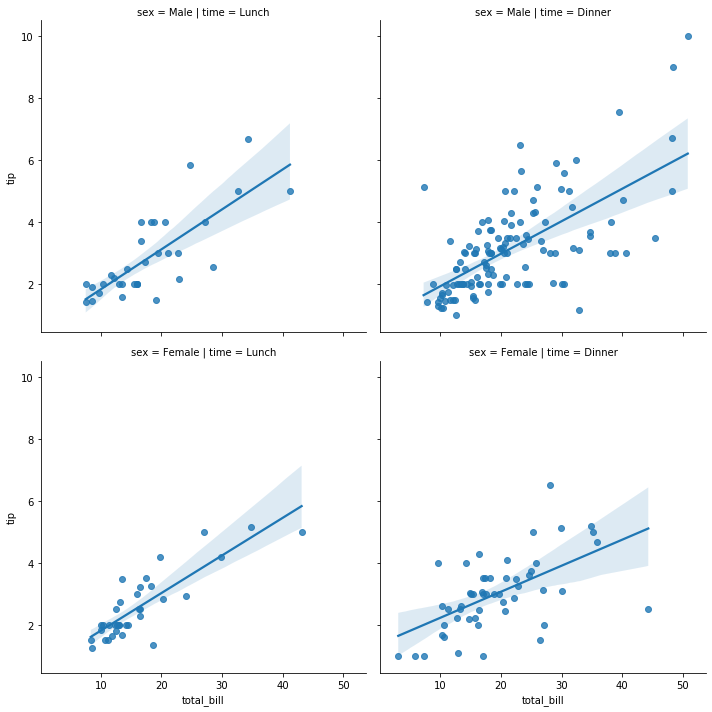

In [9]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

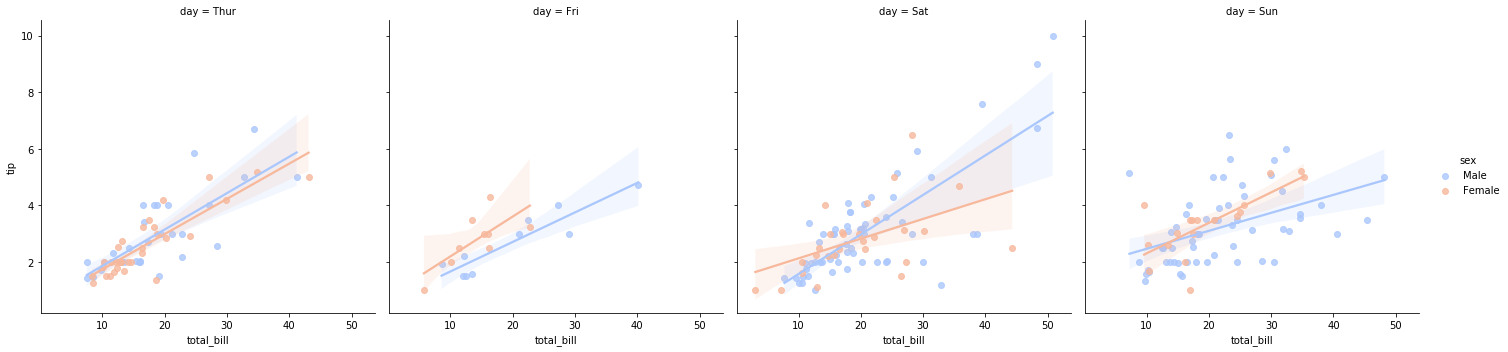

In [10]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

c:\python\python38-32\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


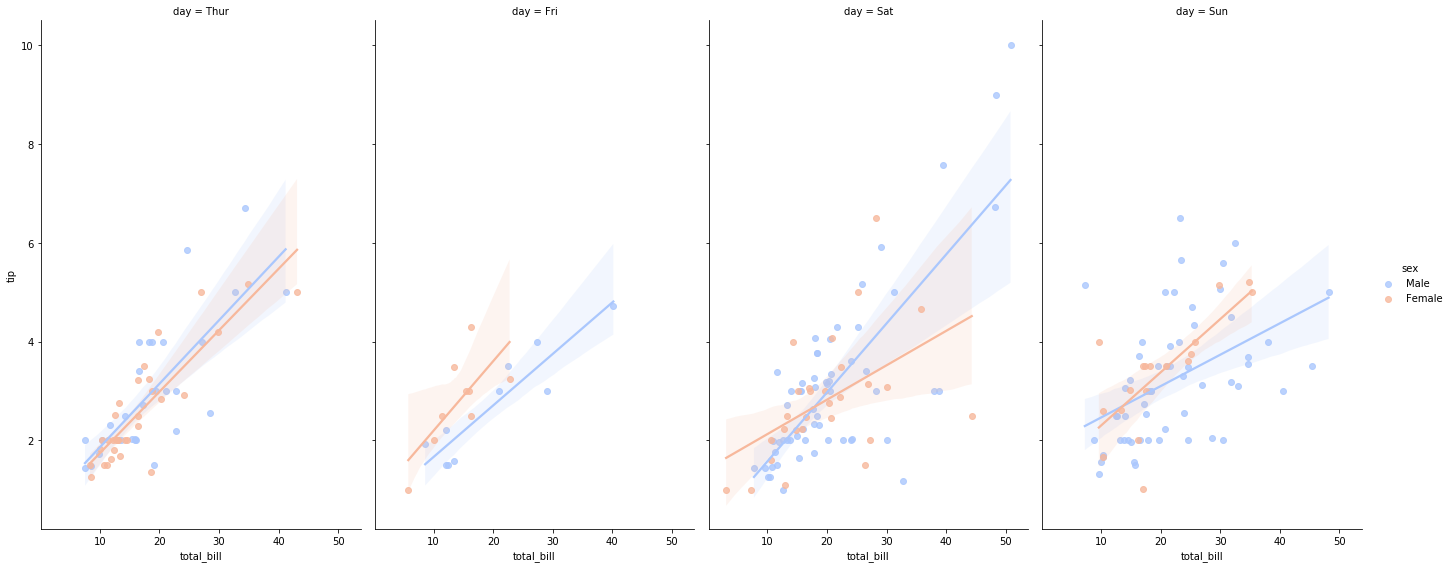

In [11]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

## **regplot**

Estimate and plot a regression model relating the x and y variables.

Also plot the size of the confidence interval for the regression estimate. 
This will be drawn using translucent bands around the regression line. 
The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

Plot the relationship between two variables in a DataFrame:


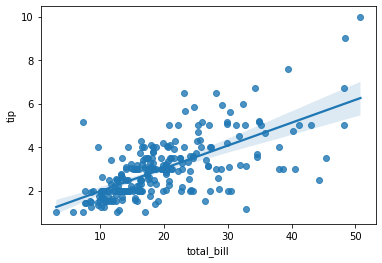

In [13]:
 tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

Plot with two variables defined as numpy arrays; use a different color:

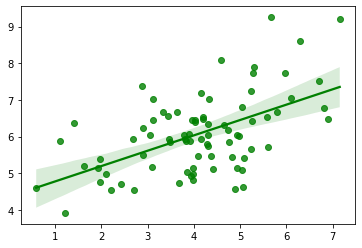

In [16]:
import numpy as np; np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
ax = sns.regplot(x=x, y=y, color="g")

Plot with two variables defined as pandas Series; use a different marker:

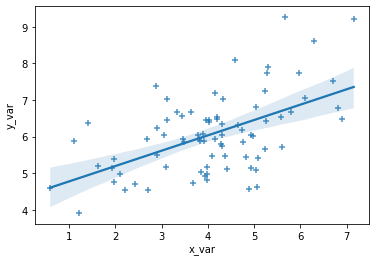

In [17]:
import pandas as pd
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
ax = sns.regplot(x=x, y=y, marker="+")

Use a 68% confidence interval, which corresponds with the standard error of the estimate, and extend the regression line to the axis limits:

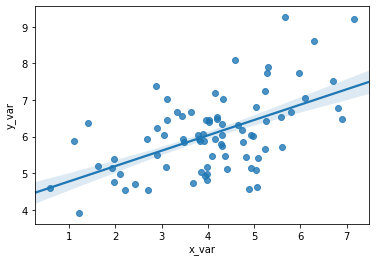

In [18]:
ax = sns.regplot(x=x, y=y, ci=68, truncate=False)

Plot with a discrete x variable and add some jitter:

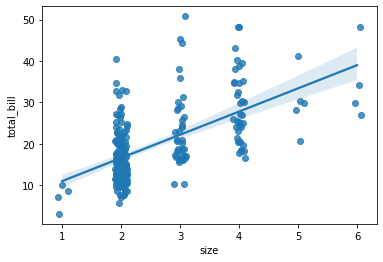

In [19]:
ax = sns.regplot(x="size", y="total_bill", data=tips, x_jitter=.1)

Plot with a discrete x variable showing means and confidence intervals for unique values:

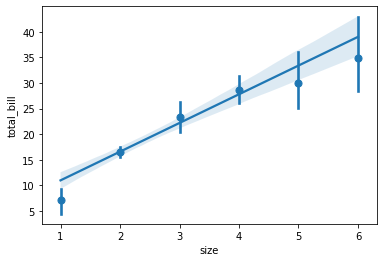

In [21]:
ax = sns.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean)

Fit a higher-order polynomial regression:

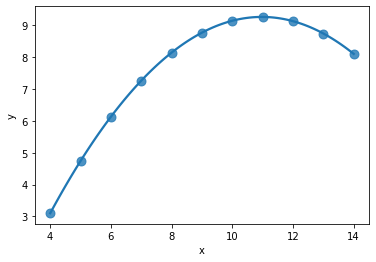

In [22]:
ans = sns.load_dataset("anscombe")
ax = sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"],
                 scatter_kws={"s": 80}, order=2, ci=None)

## Check the official documentation of seaborn for more:
https://seaborn.pydata.org/
    